<a href="https://colab.research.google.com/github/Romal27/DSGP-24-Retina94/blob/Validating-the-input/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install imagehash


   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.2 MB ? eta -:--:--
   ------- -------------------------------- 0.8/4.2 MB 2.2 MB/s eta 0:00:02
   ------------ --------------------------- 1.3/4.2 MB 2.5 MB/s eta 0:00:02
   ----------------- ---------------------- 1.8/4.2 MB 2.5 MB/s eta 0:00:01
   ------------------------ --------------- 2.6/4.2 MB 2.6 MB/s eta 0:00:01
   ----------------------------- ---------- 3.1/4.2 MB 2.6 MB/s eta 0:00:01
   ---------------------------------- ----- 3.7/4.2 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 4.2/4.2 MB 2.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import os
import shutil
import uuid
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import hashlib

In [ ]:


# Define paths
base_folder = "D:/Data1"
fundus_folder = os.path.join(base_folder, "Fundus")
non_fundus_folder = os.path.join(base_folder, "Non Fundus")
duplicates_folder = "D:/Data1/duplicates"

# Ensure duplicates folder exists
os.makedirs(duplicates_folder, exist_ok=True)

# Function to calculate hash of an image
def calculate_hash(image_path):
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

# Function to find duplicates
def find_duplicates(folder):
    hashes = {}
    duplicates = []
    for root, _, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            img_hash = calculate_hash(file_path)
            if img_hash in hashes:
                duplicates.append(file_path)
            else:
                hashes[img_hash] = file_path
    return duplicates


In [ ]:

# Function to visualize class distribution
def visualize_class_distribution(title):
    counts = {
        "fundus": len(os.listdir(fundus_folder)),
        "non_fundus": len(os.listdir(non_fundus_folder))
    }
    plt.figure(figsize=(6, 4))
    plt.bar(counts.keys(), counts.values(), color=['blue', 'red'])
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title(title)
    plt.show()


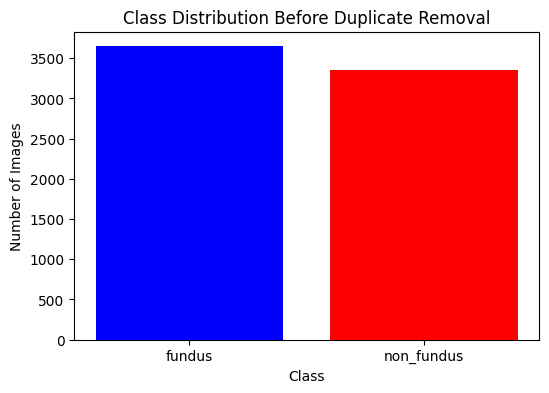

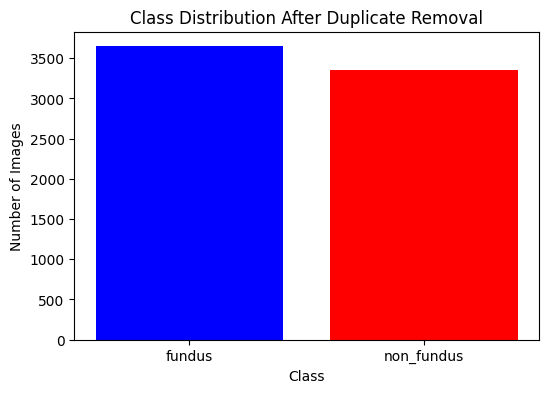

No duplicates found after removal.
Moved 0 duplicate images to 'duplicates' folder.


In [9]:

# Visualize before removal
visualize_class_distribution("Class Distribution Before Duplicate Removal")

# Detect duplicates
fundus_duplicates = find_duplicates(fundus_folder)
non_fundus_duplicates = find_duplicates(non_fundus_folder)

# Move duplicates
for duplicate in fundus_duplicates + non_fundus_duplicates:
    shutil.move(duplicate, os.path.join(duplicates_folder, os.path.basename(duplicate)))

# Visualize after removal
visualize_class_distribution("Class Distribution After Duplicate Removal")

# Check for any remaining duplicates
remaining_fundus_duplicates = find_duplicates(fundus_folder)
remaining_non_fundus_duplicates = find_duplicates(non_fundus_folder)

if remaining_fundus_duplicates or remaining_non_fundus_duplicates:
    print("Warning: Some duplicates may still be present.")
    print(f"Remaining fundus duplicates: {len(remaining_fundus_duplicates)}")
    print(f"Remaining non-fundus duplicates: {len(remaining_non_fundus_duplicates)}")
else:
    print("No duplicates found after removal.")

print(f"Moved {len(fundus_duplicates) + len(non_fundus_duplicates)} duplicate images to '{duplicates_folder}' folder.")

Found 7152 images belonging to 3 classes.
Training on fold 1/3...
Found 4768 validated image filenames belonging to 2 classes.
Found 2384 validated image filenames belonging to 2 classes.


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 487s 2s/step - accuracy: 0.5306 - loss: 0.6970 - val_accuracy: 0.5315 - val_loss: 0.6901 - learning_rate: 1.0000e-04
Epoch 2/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - accuracy: 0.5082 - loss: 0.6938 - val_accuracy: 0.5315 - val_loss: 0.6899 - learning_rate: 1.0000e-04
Epoch 3/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.5242 - loss: 0.6919 - val_accuracy: 0.5315 - val_loss: 0.6929 - learning_rate: 1.0000e-04
Epoch 4/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 342s 1s/step - accuracy: 0.5270 - loss: 0.6926 - val_accuracy: 0.5315 - val_loss: 0.6883 - learning_rate: 1.0000e-04
Epoch 5/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.5245 - loss: 0.6912 - val_accuracy: 0.5315 - val_loss: 0.6903 - learning_rate: 1.0000e-04
Epoch 6/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.5286 - loss: 0.6896 - val_accuracy: 0.5315 - val_loss: 0.6885 - learning_rate: 1.0000e-04
Epoch 7/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 314s 1s/step - acc

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 297s 979ms/step - accuracy: 0.5040 - loss: 0.7026 - val_accuracy: 0.5315 - val_loss: 0.6912 - learning_rate: 1.0000e-04
Epoch 2/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 289s 970ms/step - accuracy: 0.5241 - loss: 0.6937 - val_accuracy: 0.5315 - val_loss: 0.6901 - learning_rate: 1.0000e-04
Epoch 3/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.5193 - loss: 0.6924 - val_accuracy: 0.5315 - val_loss: 0.6913 - learning_rate: 1.0000e-04
Epoch 4/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 289s 970ms/step - accuracy: 0.5180 - loss: 0.6945 - val_accuracy: 0.5315 - val_loss: 0.6899 - learning_rate: 1.0000e-04
Epoch 5/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 643s 2s/step - accuracy: 0.5326 - loss: 0.6908 - val_accuracy: 0.5315 - val_loss: 0.6897 - learning_rate: 1.0000e-04
Epoch 6/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.5295 - loss: 0.6911 - val_accuracy: 0.5315 - val_loss: 0.6914 - learning_rate: 1.0000e-04
Epoch 7/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 314s 1s/s

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 1835s 6s/step - accuracy: 0.5184 - loss: 0.6965 - val_accuracy: 0.5315 - val_loss: 0.6908 - learning_rate: 1.0000e-04
Epoch 2/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 289s 969ms/step - accuracy: 0.5196 - loss: 0.6926 - val_accuracy: 0.5315 - val_loss: 0.6899 - learning_rate: 1.0000e-04
Epoch 3/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 289s 971ms/step - accuracy: 0.5289 - loss: 0.6923 - val_accuracy: 0.5315 - val_loss: 0.6896 - learning_rate: 1.0000e-04
Epoch 4/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 292s 982ms/step - accuracy: 0.5395 - loss: 0.6899 - val_accuracy: 0.5315 - val_loss: 0.6903 - learning_rate: 1.0000e-04
Epoch 5/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 288s 968ms/step - accuracy: 0.5237 - loss: 0.6915 - val_accuracy: 0.5315 - val_loss: 0.6887 - learning_rate: 1.0000e-04
Epoch 6/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 288s 967ms/step - accuracy: 0.5220 - loss: 0.6914 - val_accuracy: 0.5315 - val_loss: 0.6891 - learning_rate: 1.0000e-04
Epoch 7/15
298/298 ━━━━━━━━━━━━━━━━━━━━ 28

Model training complete. Saved at: D:/new_model_fundus.h5
Original Labels:
[0 0 0 ... 2 2 2]
447/447 ━━━━━━━━━━━━━━━━━━━━ 314s 700ms/step
Predicted Labels:
[1 1 1 ... 1 1 1]


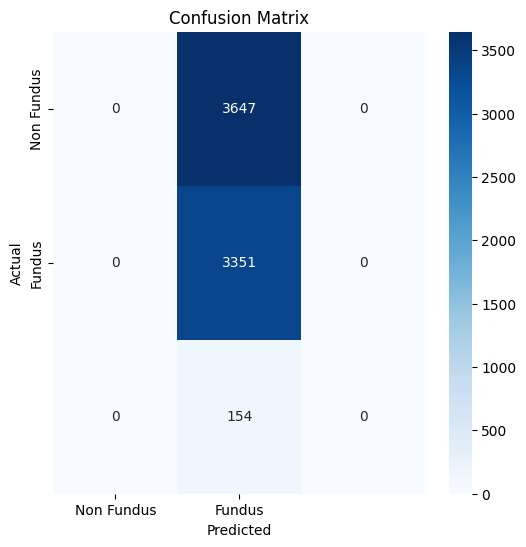

Classification Report:


ValueError: Number of classes, 3, does not match size of target_names, 2. Try specifying the labels parameter

In [4]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

# Updated Dataset Path
dataset_path = "D:/Data1"  # Contains 'Fundus' and 'Non Fundus'
model_save_path = "D:/new_model_fundus.h5"

# Image Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 16  # Lower batch size
EPOCHS = 15  # Updated epochs
LEARNING_RATE = 0.0001
K_FOLDS = 3  # Updated K-Fold

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

# K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=42)
X, y = np.array(data_generator.filepaths), np.array(data_generator.classes)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"Training on fold {fold + 1}/{K_FOLDS}...")
    train_files = X[train_idx].tolist()
    val_files = X[val_idx].tolist()
    train_labels = ['Fundus' if y[i] == 1 else 'Non Fundus' for i in train_idx]
    val_labels = ['Fundus' if y[i] == 1 else 'Non Fundus' for i in val_idx]

    train_data = datagen.flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': train_files, 'class': train_labels}),
        directory=None,
        x_col='filename',
        y_col='class',
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary'
    )

    val_data = datagen.flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': val_files, 'class': val_labels}),
        directory=None,
        x_col='filename',
        y_col='class',
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary'
    )

    # Load Pretrained Model
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False  # Freeze base model layers

    # Build Model
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=output)

    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Updated patience
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

    # Train Model
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=EPOCHS,
        callbacks=[early_stopping, reduce_lr]
    )

# Save Model
model.save(model_save_path)
print("Model training complete. Saved at:", model_save_path)

# Print Labels Before and After Training
print("Original Labels:")
print(y)

predictions = model.predict(data_generator)
predictions = (predictions > 0.5).astype(int).flatten()

print("Predicted Labels:")
print(predictions)

# Confusion Matrix
conf_matrix = confusion_matrix(y, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Fundus', 'Fundus'], yticklabels=['Non Fundus', 'Fundus'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print("Classification Report:")
print(classification_report(y, predictions, target_names=['Non Fundus', 'Fundus']))

In [ ]:

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fundus", "Fundus"], yticklabels=["Non-Fundus", "Fundus"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(f"Model saved at: {MODEL_SAVE_PATH}")


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("D:/saved_model_fundus.h5")
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9911 - loss: 1.0744
Test Accuracy: 98.13%
Test Loss: 1.2224


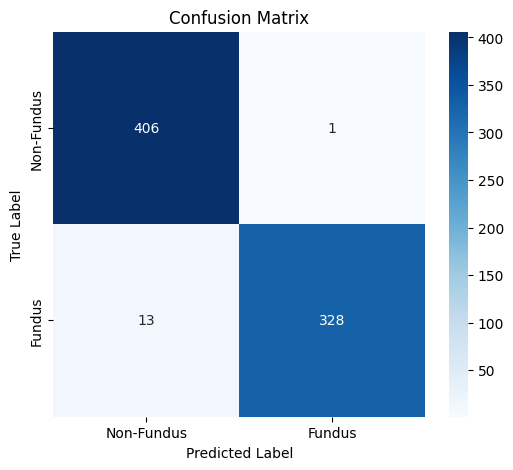

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fundus", "Fundus"], yticklabels=["Non-Fundus", "Fundus"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [1]:
import time
import tensorflow as tf
from tensorflow.keras.models import load_model

model_path = "D:/saved_model_fundus.h5"

start_time = time.time()
model = load_model(model_path)
end_time = time.time()

print(f"Model loaded in {end_time - start_time:.2f} seconds")


Model loaded in 0.87 seconds


In [21]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

model_path = "D:/saved_model_fundus.h5"
model = tf.keras.models.load_model(model_path)



In [ ]:
img_path = r"D:\Datasets_Final\test\Fundus\N3.jpg"
img = image.load_img(img_path, target_size=(224, 224))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  

prediction = model.predict(img_array)

# Check output
print("Prediction:", prediction)

# Interpret the prediction based on your labeling (e.g., 0 = fundus, 1 = non-fundus)
if prediction[0] > 0.5:
    print("Model predicts: Non-Fundus")
else:
    print("Model predicts: Fundus")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction: [[1.233044e-19]]
Model predicts: Fundus


In [ ]:
test_image_path = "C:\\Users\\User\\Downloads\\download.jpeg"
input_image = preprocess_single_image(test_image_path)
prediction = model.predict(input_image)

# Interpret Prediction
class_labels = ["Non-Fundus", "Fundus"]
predicted_class = class_labels[int(prediction[0] > 0.5)]
print(f"Predicted Class: {predicted_class} (Confidence: {prediction[0][0]:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Class: Non-Fundus (Confidence: 0.0000)


C:\Users\User\AppData\Local\Temp\ipykernel_19436\4066659428.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_labels[int(prediction[0] > 0.5)]



Training Fold 1/3...


Training Labels Preview:
                                          filename   class
0  D:/Datasets_Final\train\Fundus\0024cdab0c1e.png  Fundus
1  D:/Datasets_Final\train\Fundus\0097f532ac9f.png  Fundus
2  D:/Datasets_Final\train\Fundus\00a8624548a9.png  Fundus
3  D:/Datasets_Final\train\Fundus\00b74780d31d.png  Fundus
4  D:/Datasets_Final\train\Fundus\00f6c1be5a33.png  Fundus

Validation Labels Preview:
                                          filename   class
0  D:/Datasets_Final\train\Fundus\000c1434d8d7.png  Fundus
1  D:/Datasets_Final\train\Fundus\00cc2b75cddd.png  Fundus
2  D:/Datasets_Final\train\Fundus\0124dffecf29.png  Fundus
3  D:/Datasets_Final\train\Fundus\01b3aed3ed4c.png  Fundus
4  D:/Datasets_Final\train\Fundus\01c7808d901d.png  Fundus
Found 3481 validated image filenames belonging to 2 classes.
Found 1741 validated image filenames belonging to 2 classes.


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8485 - loss: 0.5027

109/109 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.8492 - loss: 0.5014 - val_accuracy: 0.9742 - val_loss: 0.2387
Epoch 2/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.9699 - loss: 0.2232 - val_accuracy: 0.9449 - val_loss: 0.2368
Epoch 3/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.9837 - loss: 0.1733 - val_accuracy: 0.9661 - val_loss: 0.1784
Epoch 4/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.9827 - loss: 0.1520 - val_accuracy: 0.9696 - val_loss: 0.1676
Epoch 5/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.9829 - loss: 0.1353 - val_accuracy: 0.9736 - val_loss: 0.1465
Epoch 6/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9901 - loss: 0.1189

109/109 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.9901 - loss: 0.1189 - val_accuracy: 0.9776 - val_loss: 0.1367
Epoch 7/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9865 - loss: 0.1118

109/109 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.9865 - loss: 0.1118 - val_accuracy: 0.9845 - val_loss: 0.1132
Epoch 8/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 282s 3s/step - accuracy: 0.9941 - loss: 0.1019 - val_accuracy: 0.9667 - val_loss: 0.1511
Epoch 9/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 280s 3s/step - accuracy: 0.9892 - loss: 0.0989 - val_accuracy: 0.9759 - val_loss: 0.1193
Epoch 10/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 301s 3s/step - accuracy: 0.9912 - loss: 0.0870 - val_accuracy: 0.9765 - val_loss: 0.1218
55/55 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9943 - loss: 0.0900
Fold 1 Validation Accuracy: 98.45%

Training Fold 2/3...


Training Labels Preview:
                                          filename   class
0  D:/Datasets_Final\train\Fundus\000c1434d8d7.png  Fundus
1  D:/Datasets_Final\train\Fundus\0024cdab0c1e.png  Fundus
2  D:/Datasets_Final\train\Fundus\00cc2b75cddd.png  Fundus
3  D:/Datasets_Final\train\Fundus\0124dffecf29.png  Fundus
4  D:/Datasets_Final\train\Fundus\0125fbd2

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8326 - loss: 0.5422

109/109 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.8333 - loss: 0.5406 - val_accuracy: 0.8989 - val_loss: 0.3684
Epoch 2/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9763 - loss: 0.2166

109/109 ━━━━━━━━━━━━━━━━━━━━ 298s 3s/step - accuracy: 0.9763 - loss: 0.2166 - val_accuracy: 0.9563 - val_loss: 0.2356
Epoch 3/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9769 - loss: 0.1810

109/109 ━━━━━━━━━━━━━━━━━━━━ 312s 3s/step - accuracy: 0.9769 - loss: 0.1810 - val_accuracy: 0.9575 - val_loss: 0.2166
Epoch 4/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 297s 3s/step - accuracy: 0.9780 - loss: 0.1642 - val_accuracy: 0.9495 - val_loss: 0.2389
Epoch 5/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9855 - loss: 0.1332

109/109 ━━━━━━━━━━━━━━━━━━━━ 458s 4s/step - accuracy: 0.9855 - loss: 0.1332 - val_accuracy: 0.9615 - val_loss: 0.1917
Epoch 6/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9893 - loss: 0.1182

109/109 ━━━━━━━━━━━━━━━━━━━━ 282s 3s/step - accuracy: 0.9893 - loss: 0.1182 - val_accuracy: 0.9650 - val_loss: 0.1784
Epoch 7/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.9882 - loss: 0.1095 - val_accuracy: 0.9345 - val_loss: 0.2429
Epoch 8/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9928 - loss: 0.0975 - val_accuracy: 0.9638 - val_loss: 0.1830
Epoch 9/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.9925 - loss: 0.0965 - val_accuracy: 0.9449 - val_loss: 0.2079
55/55 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9868 - loss: 0.1179
Fold 2 Validation Accuracy: 96.50%

Training Fold 3/3...


Training Labels Preview:
                                          filename   class
0  D:/Datasets_Final\train\Fundus\000c1434d8d7.png  Fundus
1  D:/Datasets_Final\train\Fundus\0097f532ac9f.png  Fundus
2  D:/Datasets_Final\train\Fundus\00a8624548a9.png  Fundus
3  D:/Datasets_Final\train\Fundus\00b74780d31d.png  Fundus
4  D:/Datasets_Final\train\Fundus\00cc2b75c

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9127 - loss: 0.3726

109/109 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.9130 - loss: 0.3717 - val_accuracy: 0.9707 - val_loss: 0.2101
Epoch 2/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9761 - loss: 0.1801

109/109 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.9761 - loss: 0.1800 - val_accuracy: 0.9747 - val_loss: 0.1771
Epoch 3/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9827 - loss: 0.1421

109/109 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9827 - loss: 0.1420 - val_accuracy: 0.9770 - val_loss: 0.1588
Epoch 4/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 289s 3s/step - accuracy: 0.9904 - loss: 0.1103 - val_accuracy: 0.9747 - val_loss: 0.1560
Epoch 5/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9892 - loss: 0.1079

109/109 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.9892 - loss: 0.1078 - val_accuracy: 0.9799 - val_loss: 0.1340
Epoch 6/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9896 - loss: 0.1037 - val_accuracy: 0.9753 - val_loss: 0.1433
Epoch 7/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9946 - loss: 0.0819 - val_accuracy: 0.9799 - val_loss: 0.1237
Epoch 8/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9945 - loss: 0.0754

109/109 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.9945 - loss: 0.0755 - val_accuracy: 0.9816 - val_loss: 0.1123
Epoch 9/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.9920 - loss: 0.0771 - val_accuracy: 0.9793 - val_loss: 0.1148
Epoch 10/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 288s 3s/step - accuracy: 0.9940 - loss: 0.0678 - val_accuracy: 0.9787 - val_loss: 0.1235
Epoch 11/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.9954 - loss: 0.0638 - val_accuracy: 0.9810 - val_loss: 0.1030
Epoch 12/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9956 - loss: 0.0616

109/109 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.9956 - loss: 0.0617 - val_accuracy: 0.9862 - val_loss: 0.0854
Epoch 13/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9959 - loss: 0.0607 - val_accuracy: 0.9856 - val_loss: 0.0867
Epoch 14/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9926 - loss: 0.0650 - val_accuracy: 0.9810 - val_loss: 0.1089
Epoch 15/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.9967 - loss: 0.0568 - val_accuracy: 0.9845 - val_loss: 0.0972
55/55 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9936 - loss: 0.0650
Fold 3 Validation Accuracy: 98.62%

Final Cross-Validated Accuracy: 97.86%


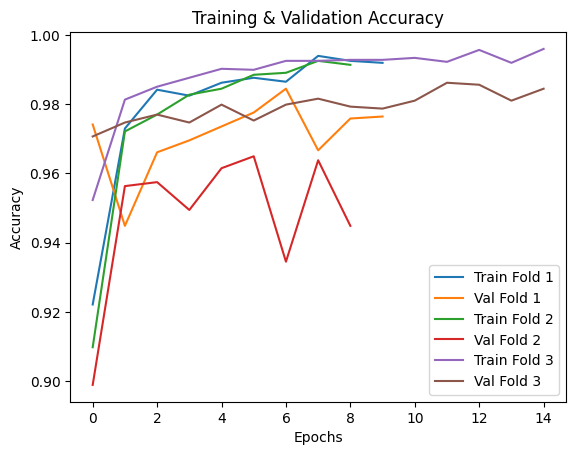

Found 748 images belonging to 2 classes.
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step


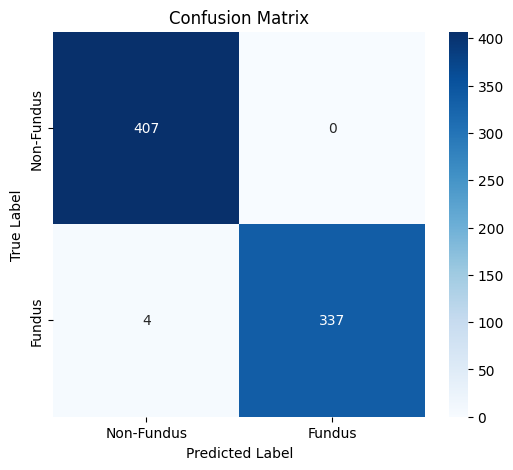


Final Classification Report:
              precision    recall  f1-score   support

  Non-Fundus       0.99      1.00      1.00       407
      Fundus       1.00      0.99      0.99       341

    accuracy                           0.99       748
   macro avg       1.00      0.99      0.99       748
weighted avg       0.99      0.99      0.99       748


Model saved at: D:/cnn_model_fundus.h5


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Paths
dataset_path = "D:/Datasets_Retina"
final_dataset_path = "D:/Datasets_Final"
model_save_path = "D:/saved_model_fundus.h5"

# Image Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
K_FOLDS = 3  

# Function for Image Preprocessing
def preprocess_image(img_path):
    try:
        img = Image.open(img_path).convert("RGB")
        img = img.resize(IMG_SIZE)
        img = np.array(img) / 255.0
        return img
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None

# Load Data
all_images = []
all_labels = []

for cls in os.listdir(os.path.join(final_dataset_path, "train")):
    class_path = os.path.join(final_dataset_path, "train", cls)
    label = 1 if cls == "Fundus" else 0
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        processed_img = preprocess_image(img_path)
        if processed_img is not None:
            all_images.append(img_path)
            all_labels.append(label)

all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=42)
fold_accuracies = []
history_list = []

for fold, (train_idx, val_idx) in enumerate(skf.split(all_images, all_labels)):
    print(f"\nTraining Fold {fold + 1}/{K_FOLDS}...\n")

    train_images, val_images = all_images[train_idx], all_images[val_idx]
    train_labels, val_labels = all_labels[train_idx], all_labels[val_idx]

    train_df = pd.DataFrame({"filename": train_images, "class": [ "Fundus" if lbl == 1 else "Non-Fundus" for lbl in train_labels]})
    val_df = pd.DataFrame({"filename": val_images, "class": [ "Fundus" if lbl == 1 else "Non-Fundus" for lbl in val_labels]})

    # Data Augmentation
    train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,   # Increased
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.3,      # Added
    shear_range=0.2 
    val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_dataframe(train_df, x_col="filename", y_col="class", target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="binary", shuffle=True)
    val_generator = val_datagen.flow_from_dataframe(val_df, x_col="filename", y_col="class", target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="binary", shuffle=False)

    # Simplified CNN Model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.0005), input_shape=(224, 224, 3)),
        MaxPooling2D(2, 2),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.0005)),
        MaxPooling2D(2, 2),
        Dropout(0.3),

        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.0005)),
        Dropout(0.3),

        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    checkpoint = ModelCheckpoint(model_save_path, monitor='val_accuracy', save_best_only=True, mode='max')

    # Train Model
    history = model.fit(train_generator, validation_data=val_generator, epochs=15, callbacks=[early_stopping, checkpoint])
    history_list.append(history)

    # Evaluate Model
    val_loss, val_accuracy = model.evaluate(val_generator)
    fold_accuracies.append(val_accuracy * 100)
    print(f"Fold {fold+1} Validation Accuracy: {val_accuracy * 100:.2f}%")

# Final Accuracy
final_accuracy = np.mean(fold_accuracies)
print(f"\nFinal Cross-Validated Accuracy: {final_accuracy:.2f}%")

# Visualization - Accuracy and Loss
plt.figure()
for i, history in enumerate(history_list):
    plt.plot(history.history['accuracy'], label=f'Train Fold {i+1}')
    plt.plot(history.history['val_accuracy'], label=f'Val Fold {i+1}')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Load Best Model and Evaluate on Test Set
best_model = tf.keras.models.load_model(model_save_path)
test_generator = val_datagen.flow_from_directory(os.path.join(final_dataset_path, "test"), target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="binary", shuffle=False)
y_true = test_generator.classes
y_pred = (best_model.predict(test_generator) > 0.5).astype(int)

# Confusion Matrix Heatmap
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fundus", "Fundus"], yticklabels=["Non-Fundus", "Fundus"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nFinal Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Non-Fundus", "Fundus"]))

# Save Model
best_model.save(model_save_path)
print(f"\nModel saved at: {model_save_path}")
